<a href="https://colab.research.google.com/github/glitchdawg/heart-failure-prediction/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Information

**Import the Necessary Libraries :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:


data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


##Data Info

In [ ]:
data.shape

(299, 13)

In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


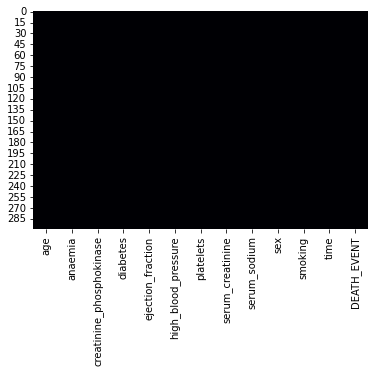

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

* **No null** values present

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.00,60.83,11.89,40.00,51.00,60.00,70.00,95.00
anaemia,299.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
creatinine_phosphokinase,299.00,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
diabetes,299.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ejection_fraction,299.00,38.08,11.83,14.00,30.00,38.00,45.00,80.00
high_blood_pressure,299.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
platelets,299.00,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
serum_creatinine,299.00,1.39,1.03,0.50,0.90,1.10,1.40,9.40
serum_sodium,299.00,136.63,4.41,113.00,134.00,137.00,140.00,148.00
sex,299.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


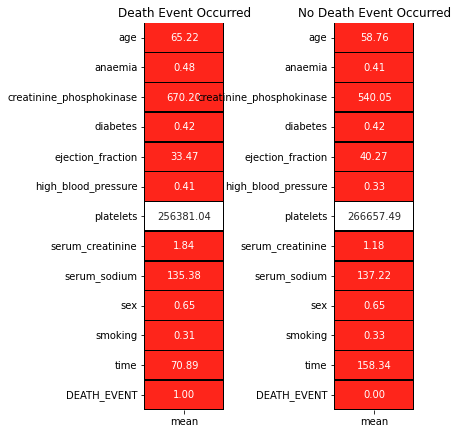

In [ ]:
yes = data[data['DEATH_EVENT'] == 1].describe().T
no = data[data['DEATH_EVENT'] == 0].describe().T

colors = ['#FE251B','#FFFFFF']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -3)

*  **Mean*** values of all the features for cases of **DEATH_EVENT** and **No DEATH_EVENT**.

# Exploratory Data Analysis

**Dividing features into Numerical and Categorical :**

In [ ]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time




* Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
* Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.



In [ ]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df1 = data.copy(deep = True)



* Converting the datatypes of age and platelets features from float to integer.
* Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
* Modifications in the original dataset will not be highlighted in this deep copy.




##Categorical Features :
Distribution of Categorical Features :


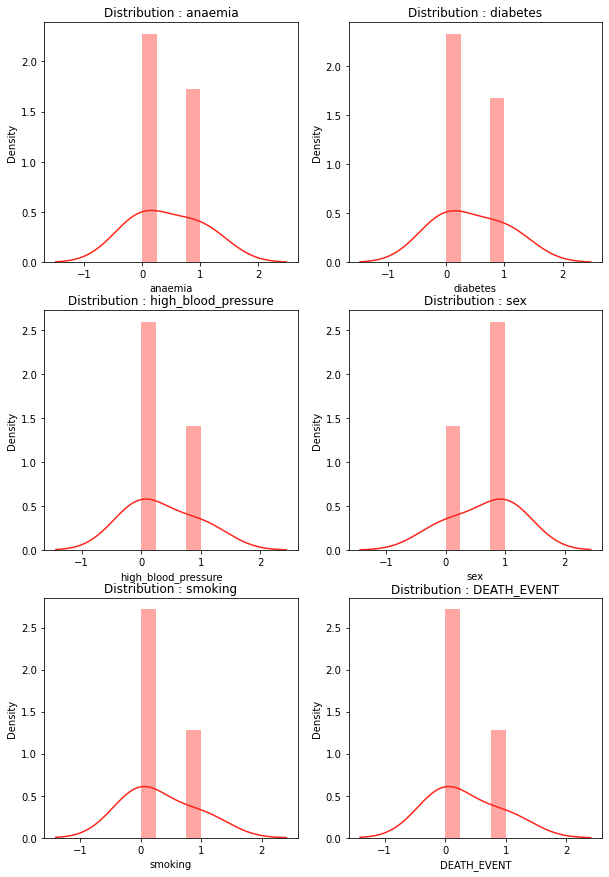

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features)):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

* All the categorical features are Normally Distributed.

## Numerical Features :
Distribution of Numerical Features :

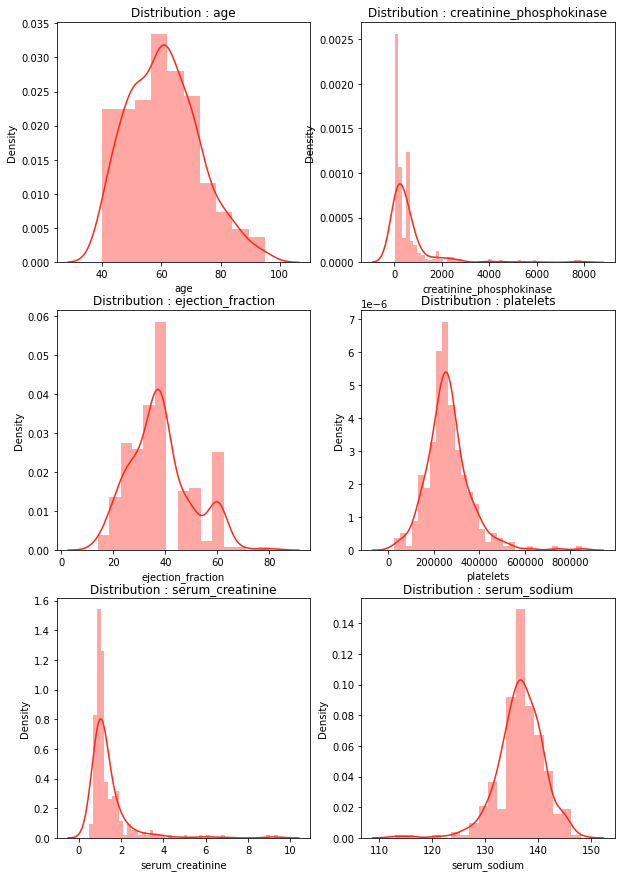

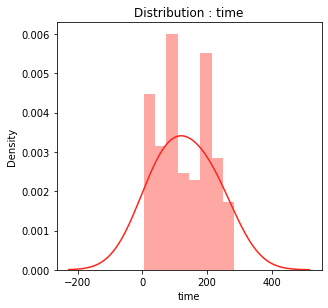

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

* **Age**,**Creatinine_Phosphokinase** **Ejaction_Fraction** and **Serum_creatinine** have a rightly or positively skewed data distribution.
* **Platelets** and **Serum_Sodium** are near about normally distributed.
* **Time**'s data distribution is similar to a typical Time Series Analysis graph with irregularities present in it.



Target Variable Visualization (DEATH_EVENT) :

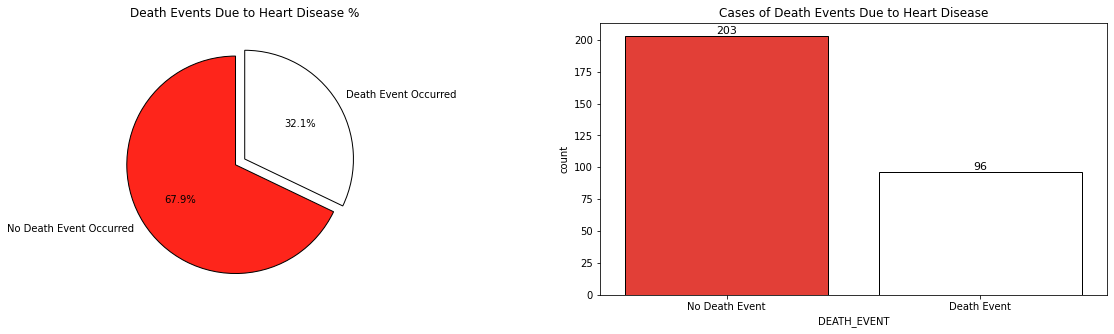

In [ ]:
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot('DEATH_EVENT',data = data, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
plt.title('Cases of Death Events Due to Heart Disease');
plt.show()



*    The dataset is **unbalanced** with very low data points (299)!
*    2 : 1 ratio for **No Death Event cases** : **Death Event cases**!
*    Due to this, predictions will be biased towards **No Death Event** cases.
*    Visualizations will also display this bias, thus making it difficult to gain insight.



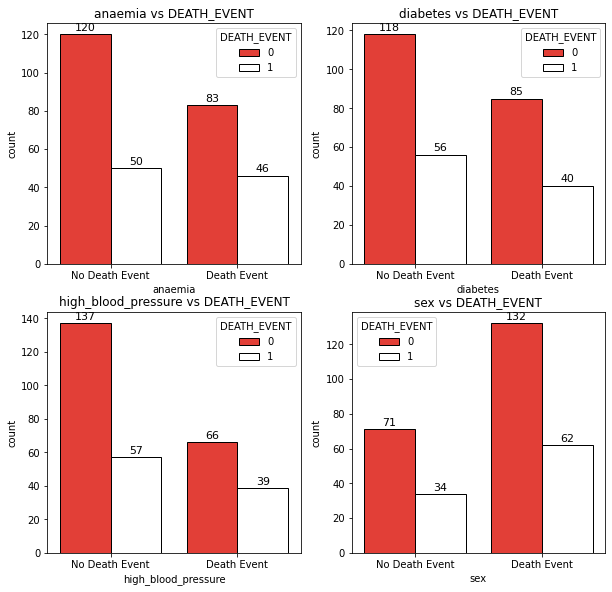

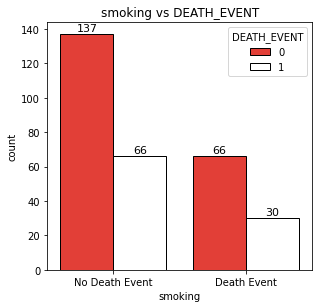

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(categorical_features) - 2):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = data,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(['No Death Event','Death Event'])
    title = categorical_features[i] + ' vs DEATH_EVENT'
    plt.title(title);
    
plt.figure(figsize = (4.75,4.55))
ax = sns.countplot(categorical_features[-2],data = data,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
title = categorical_features[-2] + ' vs DEATH_EVENT'
plt.title(title);



*    All the graphs near about share the same pattern.
*    According to the graphs, patients with negative cases of **anaemia**, **diabetes**, **high_blood_pressure** and **smoking** leads to **DEATH_EVENT** more than the positive cases of these medical conditions.
*    There are more cases cases of male population confronting a DEATH_EVENT due to heart failure than female population.



Categorical Features vs Cases of DEATH_EVENT :

In [ ]:
anaemia = data[data['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

diabetes = data[data['DEATH_EVENT'] == 1]['diabetes'].value_counts()
diabetes = [diabetes[0] / sum(diabetes) * 100,diabetes[1] / sum(diabetes) * 100]

hbp = data[data['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = data[data['DEATH_EVENT'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smoke = data[data['DEATH_EVENT'] == 1]['smoking'].value_counts()
smoke = [smoke[0] / sum(smoke) * 100,smoke[1] / sum(smoke) * 100]

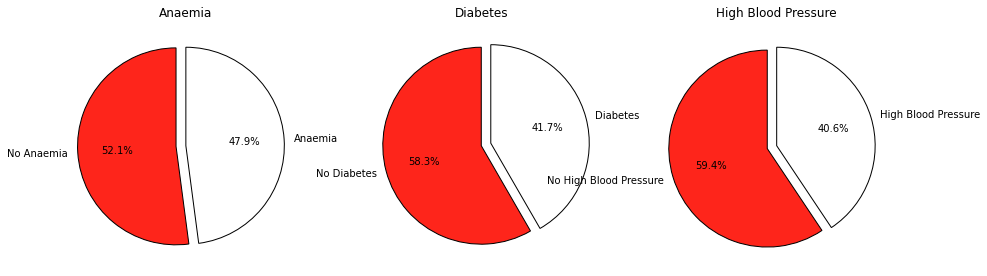

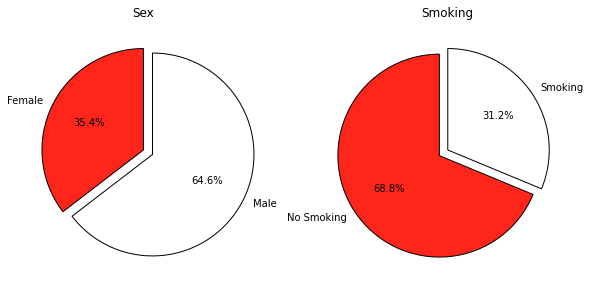

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(anaemia,labels = ['No Anaemia','Anaemia'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(1,3,2)
plt.pie(diabetes,labels = ['No Diabetes', 'Diabetes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(1,3,3)
plt.pie(hbp,labels = ['No High Blood Pressure','High Blood Pressure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High Blood Pressure');

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(sex,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(1,2,2)
plt.pie(smoke,labels = ['No Smoking','Smoking'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');



*    These piecharts support the case for more **DEATH_EVENT** due to negative cases of **anaemia**, **diabetes**, **high_blood_pressure** and **smoking** than their positive counterparts.
*    Out of the total cases of heart failure leading to **DEATH_EVENT**, males are more prone to it than females.




Numerical Features vs Target Variable (DEATH_EVENT) :

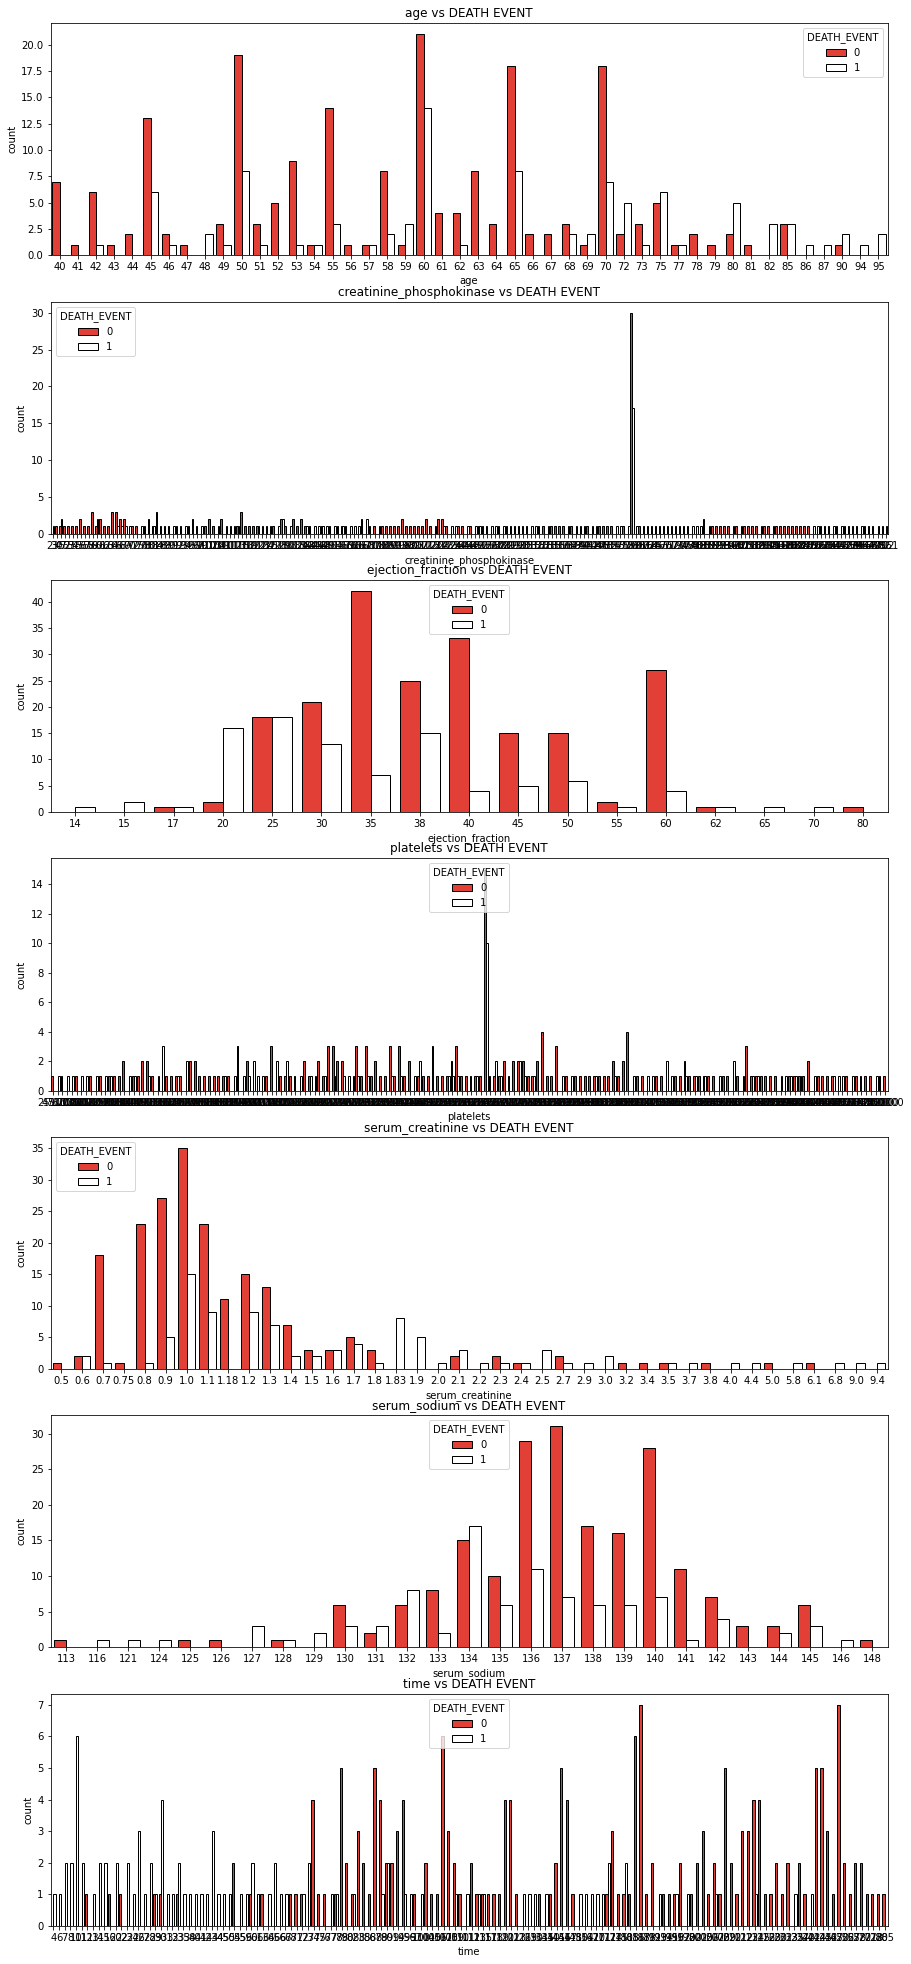

In [ ]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (15,35),squeeze = False)
for i in range(len(numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(numerical_features[i],data = data,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    title = numerical_features[i] + ' vs DEATH EVENT'
    plt.title(title);



*    Cases of **DEATH_EVENT** initiate from the age of **45**. Some specific peaks of high cases of **DEATH_EVENT** can be observed at 45, 50, 60, 65, 70, 75 and 80.
*    High cases of **DEATH_EVENT** can be observed for **ejaction_fraction** values from 20 - 60.
*    **serum_creatinine** values from **0.6** to **3.0** have higher probability to lead to **DEATH_EVENT**.
*    **serum_sodium** values **127 - 145** indicate towards a **DEATH_EVENT** due to heart failure.

*    Because of too many unique data points in the **creatinine_phosphokinase**, **platelets** and **time** features, it is difficult to gain any type of insight. Thus, we will convert these features into categorical features for visualizations.
*    We scale the data points of these features to a constant value that represents a range of values.(like mean)
*    Here, we divide the data points constant value and assign its quotient value as the representative constant for that data point. The scaling constants are decided by looking into the data & intuition.



In [ ]:
data['creatinine_phosphokinase_Group'] = [ int(i / 100) for i in data['creatinine_phosphokinase']]
data['platelets_Group'] = [ int(i / 10**5) for i in data['platelets']]
data['time_Group'] = [ int(i / 5) for i in data['time']]

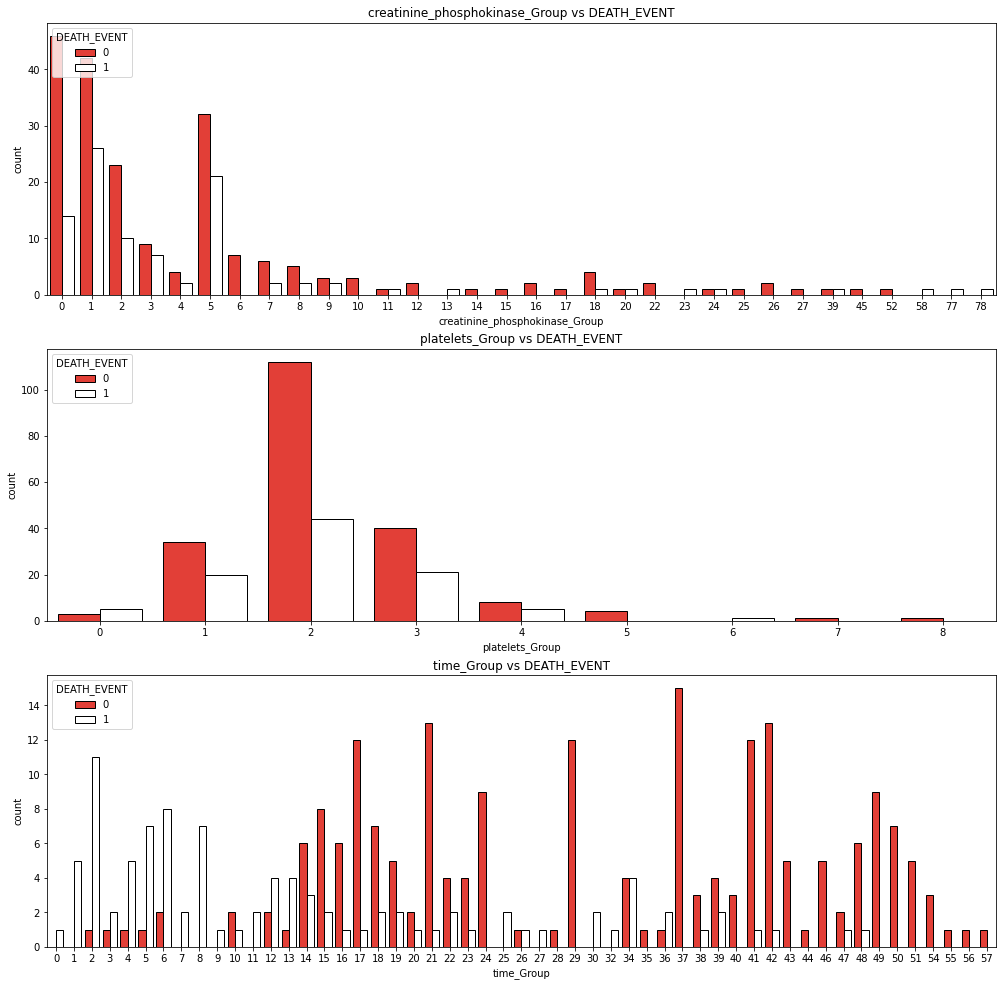

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (17,17))
group_numerical_features = [i + '_Group' for i in ['creatinine_phosphokinase','platelets','time']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(group_numerical_features[i],data = data,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    title = group_numerical_features[i] + ' vs DEATH_EVENT'
    plt.title(title);



*    **DEATH_EVENT** cases are on a high for the values between **0**(0x100) - **500**(5x100) for **creatinine_phosphokinase**.
*    platelets values between **0**(0x10^5) - **400,000**(4x10^5) are prone to heart failures leading to **DEATH_EVENT**.
*    For the **time** feature, values from **0**(0x5) - **170**(34x5) have higher probability to lead to a **DEATH_EVENT**.




## Categorical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :
anaemia vs Numerical Features :



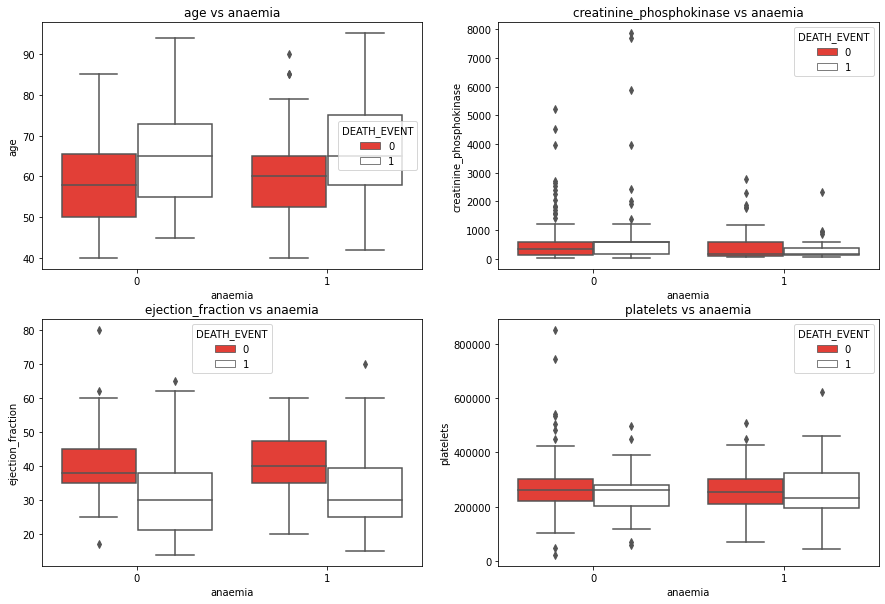

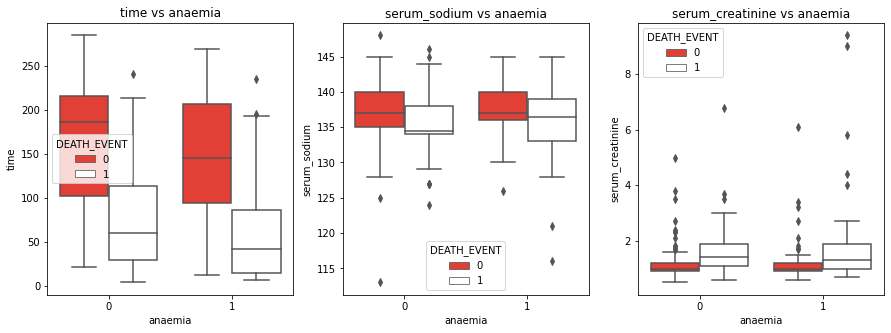

In [ ]:


fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'anaemia',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs anaemia' 
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'anaemia',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs anaemia' 
    plt.title(title);





*    Irrespective of **anaemia**, age group of **55 - 75** and **ejaction_fraction** values of **20 - 40** are prone to **DEATH_EVENT**.
*    Similarly, **serum_creatinine** levels between **1 - 2** and **serum_sodium** levels of **130 - 140** display a higher chance of confronting a **DEATH_EVENT**.



**diabetes vs Numerical Features :**

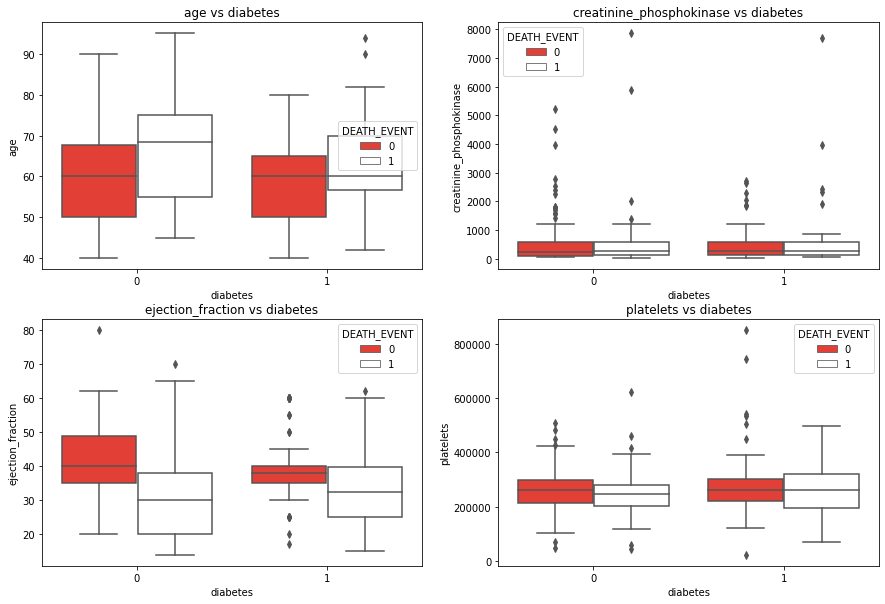

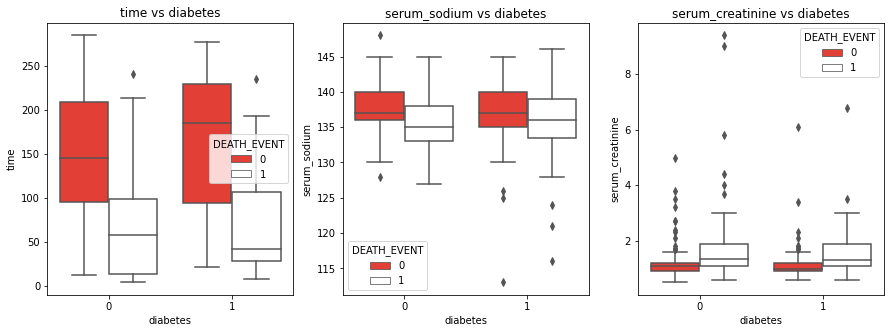

In [ ]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'diabetes',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs diabetes' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'diabetes',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs diabetes' 
    plt.title(title);


*    For **creatinine_phosphokinase**, values from **0 - 500** and **platelets** range from **2x10^5 - 3x10^5** detect more cases of heart failure.
*    Similarly, **serum_creatinine** levels between **1 - 2** and time feature's values from **0 - 100** highlight more heart failure cases.



**high_blood_pressure vs Numerical features :**

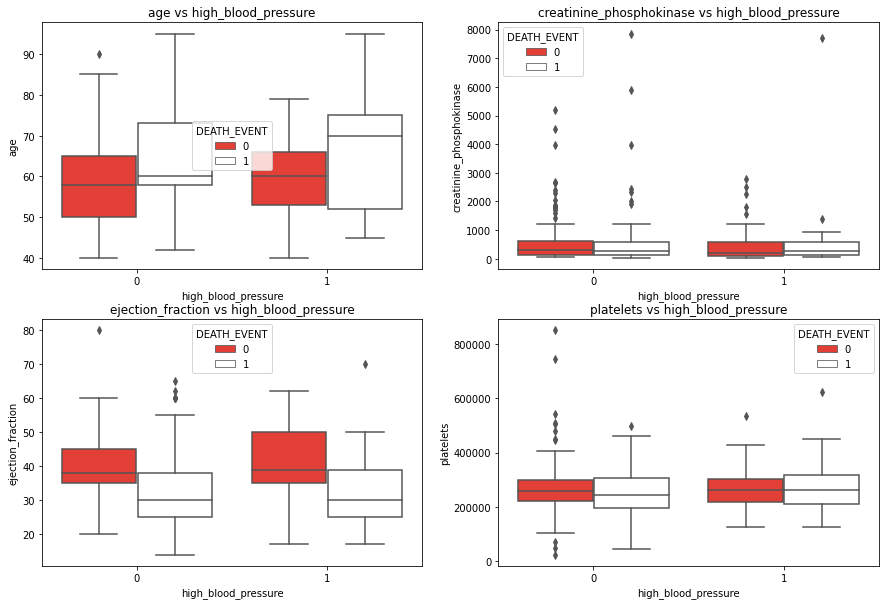

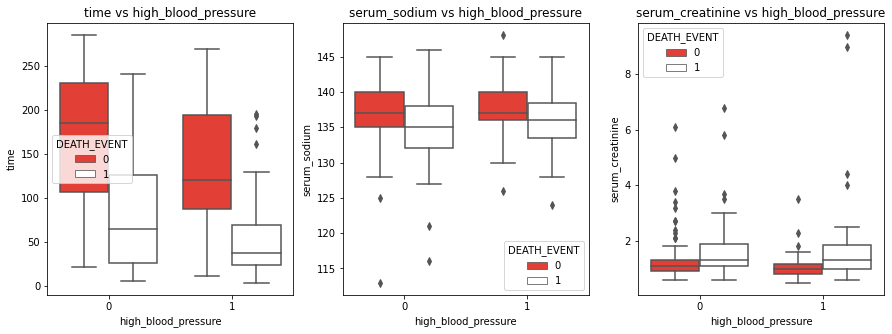

In [ ]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'high_blood_pressure',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs high_blood_pressure' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'high_blood_pressure',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs high_blood_pressure' 
    plt.title(title);



*    Due to **high_blood_pressure**, **age** at which the **DEATH_EVENT** occurs for heart failure increases its range of values. The lower threshold of age limit drops just **below 55** and upper limit extends **over 70**.
*    Chances of confronting a **DEATH_EVENT** due to **high_blood_pressure** lowers the values of **time** feature's values and increases the chances of heart failure.



**sex vs Numerical Features :**

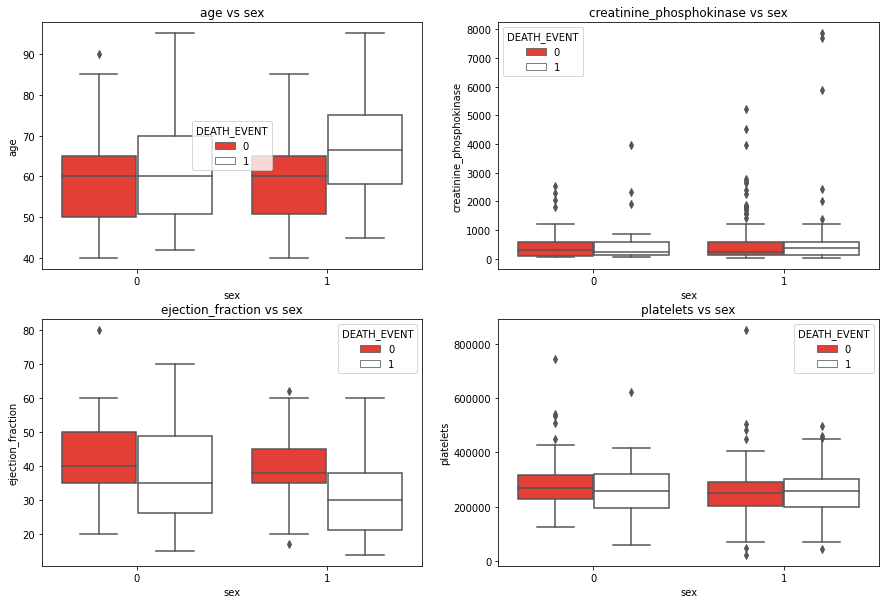

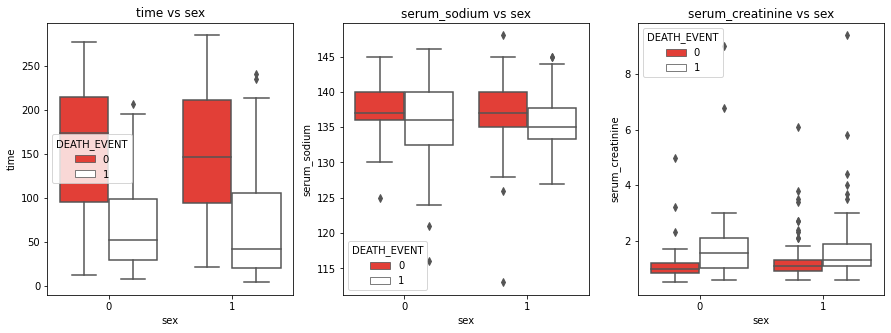

In [ ]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'sex',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'sex',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs sex' 
    plt.title(title);



*    For female(0) population, **age** group **50 - 70** and male(1) population's **age** group **60 - 75** are more prone to heart failure leading to **DEATH_EVENT**.
*    **ejaction_fraction** values for female(0) population of **30 - 50** and **20 - 40** for male(1) population leads to cases of **DEATH_EVENT**.
*    **serum_sodium** values indicating **DEATH_EVENT** due to heart failure is different for male and female.



**smoking vs Numerical Features**

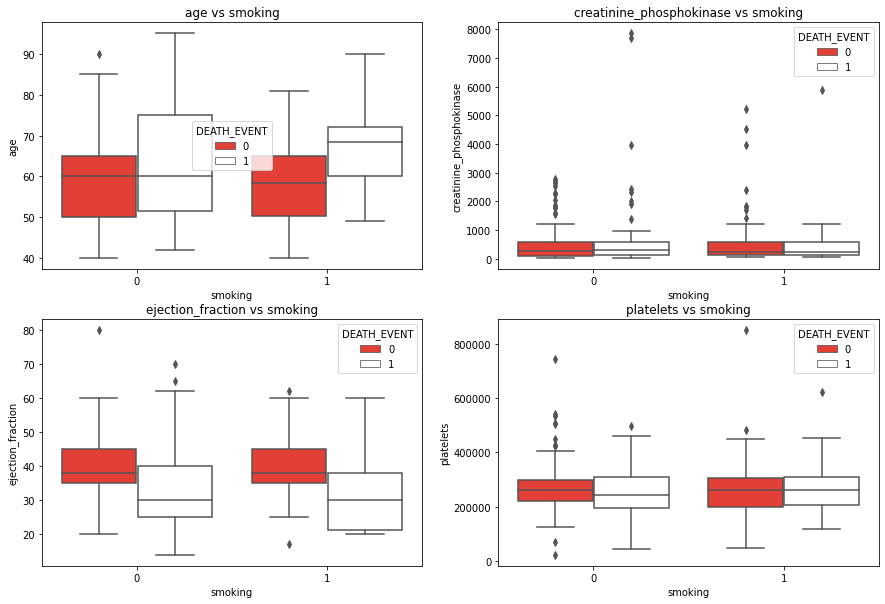

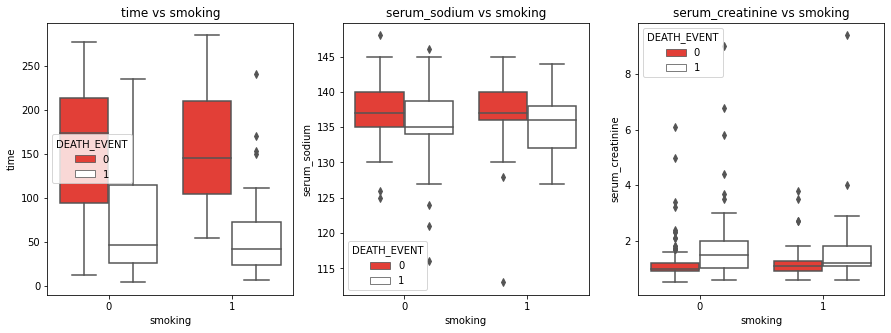

In [ ]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'smoking',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs smoking' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'smoking',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs smoking' 
    plt.title(title);



*    **age** group of **60 - 70** dominates the cases for **DEATH_EVENT** due to **smoking**. However, range of values ,**50 - 75** , increases for cases of **DEATH_EVENT** that do not **smoke**.
*    **Smoking** reduces the range of values for feature time to **0 - 75** that someone might face a **DEATH_EVENT**.



**Numerical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :**

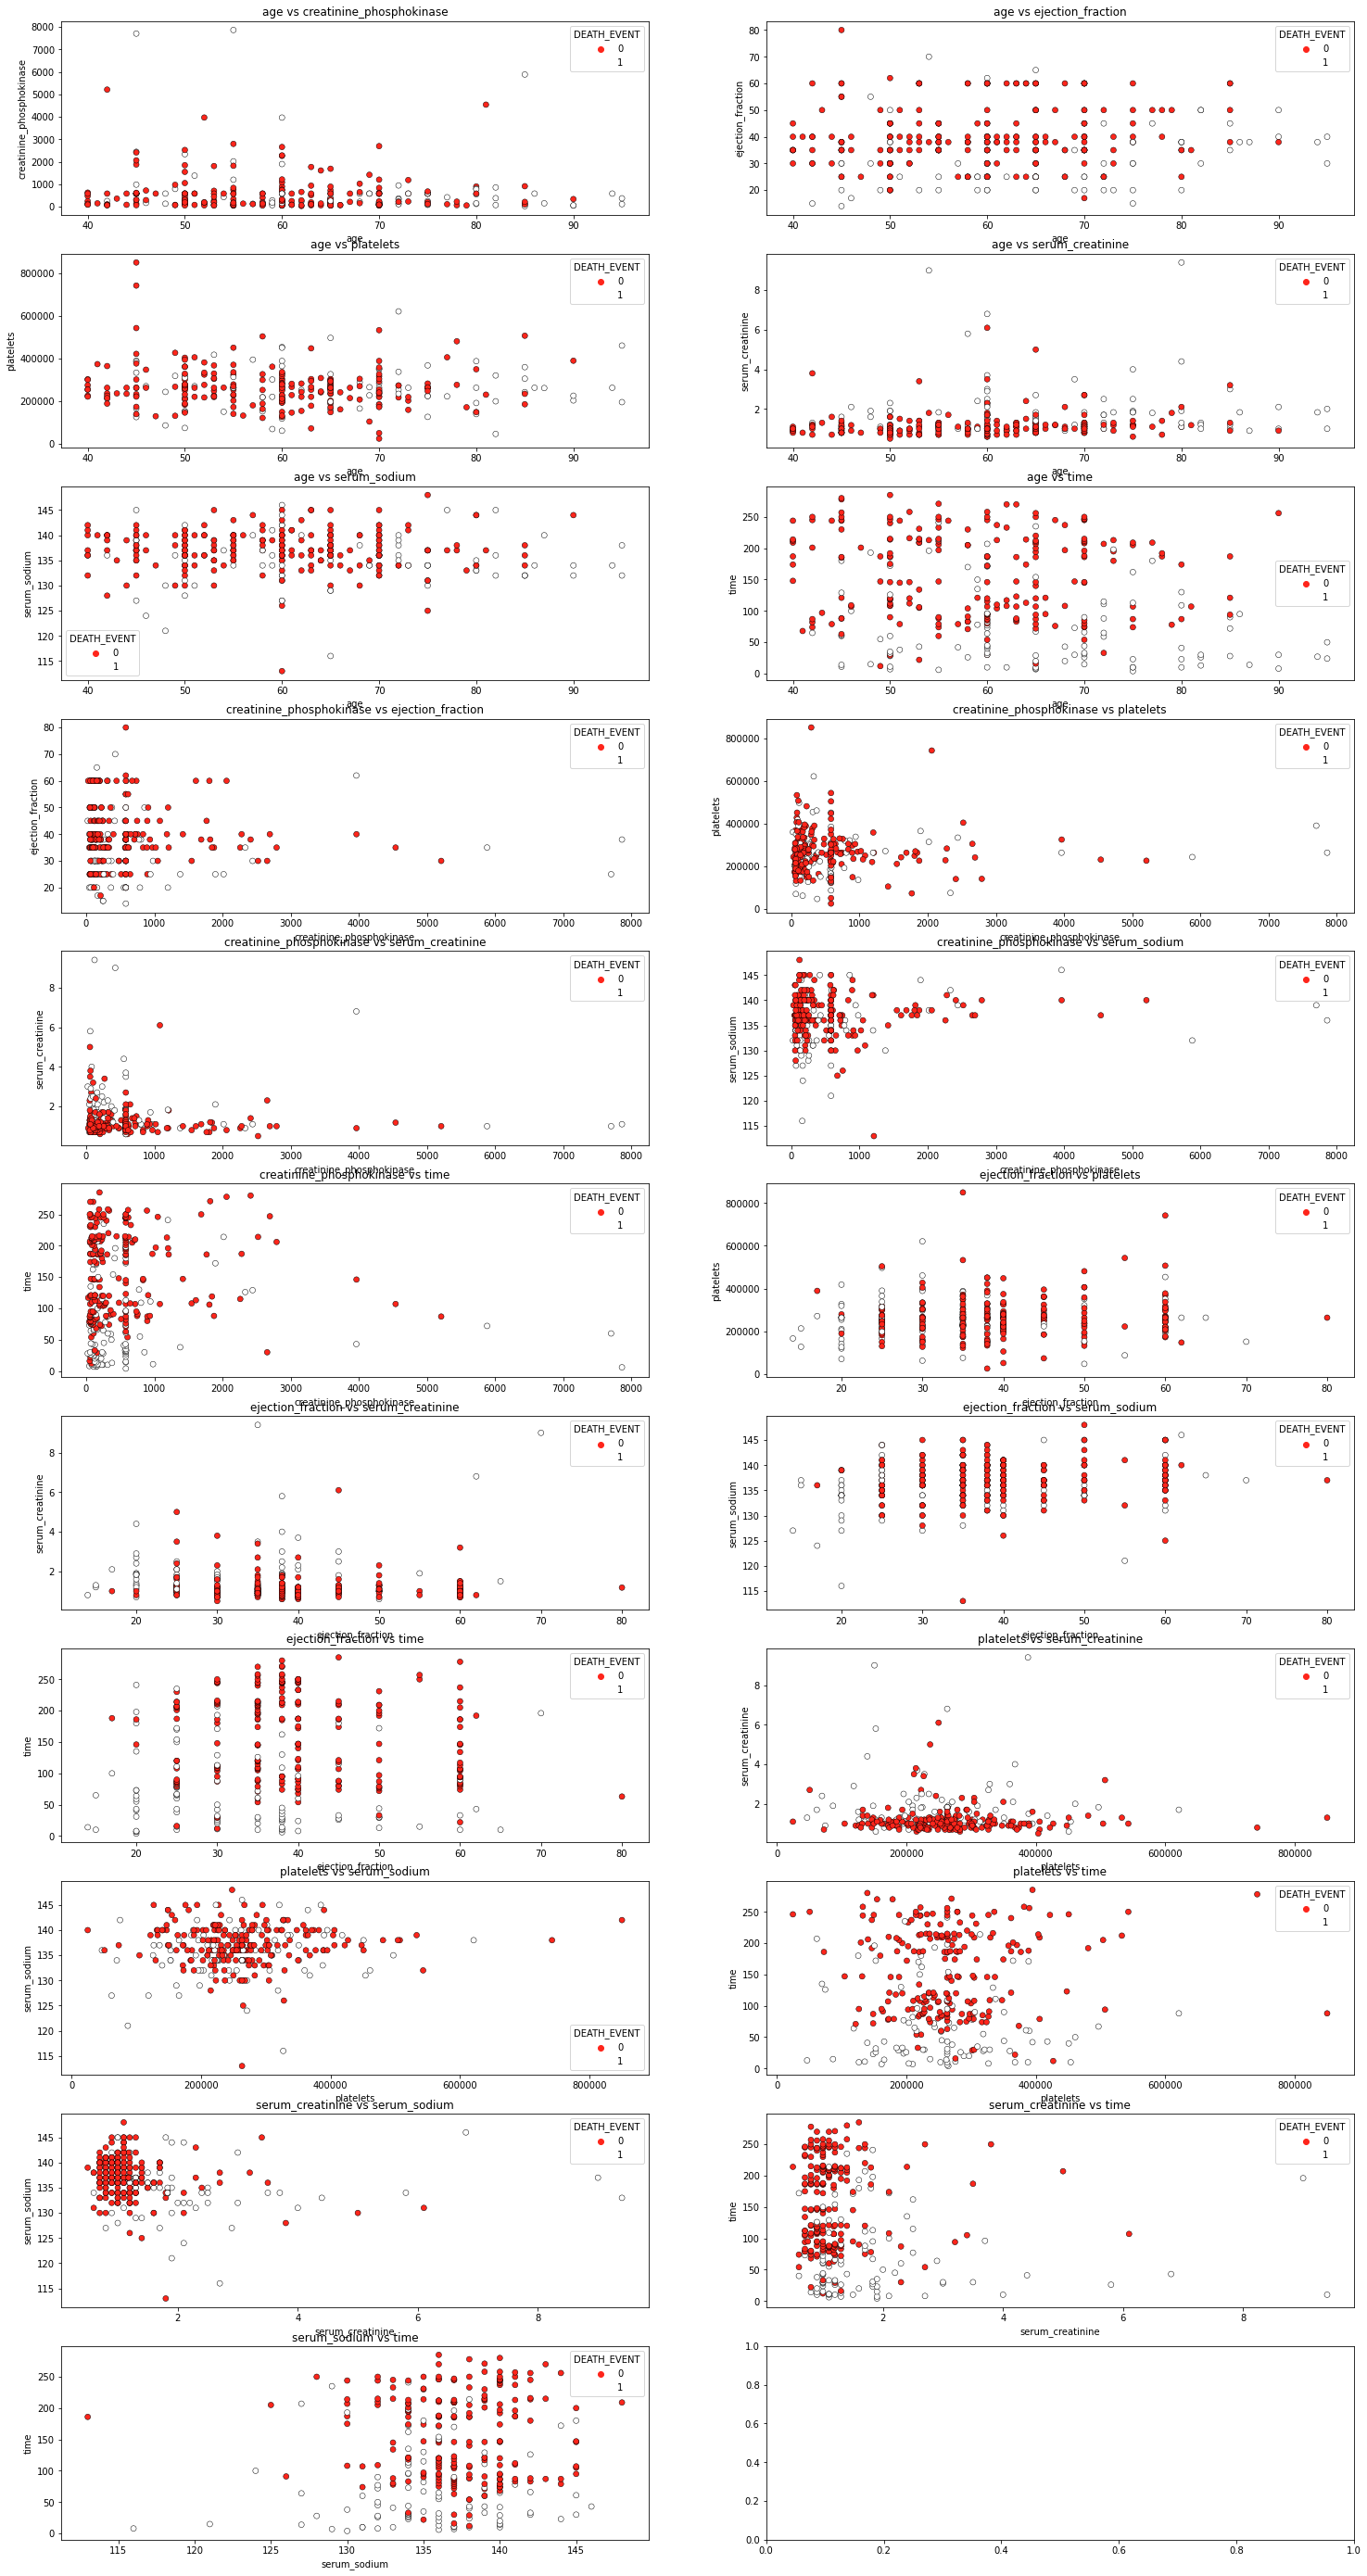

In [ ]:


a = 0
fig,ax = plt.subplots(nrows = 11,ncols = 2,figsize = (25,50),squeeze = False)
for i in range(len(numerical_features) - 1):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(11,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'DEATH_EVENT',palette = colors,edgecolor = 'black');
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)





*    For **time vs age** plot, **DEATH_EVENT** peaks can be found at **age** values of 50, 60, 70 and 80 for time value range between **50 - 100**.
*    **creatinine_phosphokinase** values between 0 - 500 are dominant in recording **DEATH_EVENT** irrespective of other features.
*    Similarly, **ejaction_fraction** values between **20 - 40** record high number of cases of **DEATH_EVENT**.
*    **platelets** range of values between **2x10^5 - 4x10^5** and time between **0 - 50** is a strong indicator for **DEATH_EVENT**.
*    Another indicator for **DEATH_EVENT** is **serum_creatinine** values from **0 - 2** with time values from **0 - 50**.
*    **serum_sodium** range of values from **130 - 140** record high number of cases for **DEATH_EVENT**.



# Summary EDA


Order / Values of features for positive cases of heart failure (DEATH_EVENT) :

*    Categorical Features (Order) :
        * anaemia : Anaemia = No Anaemia
        * diabetes : Diabetes = No Diabetes
        * high_blood_pressure : High Blood Pressure > No High Blood Pressure (Needs more data)
        * sex : Male > Female
        * smoking : No Smoking > Smoking

*    Numerical Features (Range) :
        * age : 50 - 70
        * creatinine_phosphokinase : 0 - 500
        * ejaction_fraction : 20 - 40
        * platelets : 200,000 - 300,000
        * serum_creatinine : 1 - 2
        * serum_sodium : 130 - 140
        * time : 0 - 50

*    According to the data, these order / range of values leads to heart failures.



# Domain Information



*    **Categorical Features** :
       * **anaemia** : High chances of heart failures due to anaemia.
       * **diabetes** : High chances of heart failures due to diabetes.
       * **high blood pressure** : High chances with heart failures due to high blood pressure.
       * **sex** : male > female but by small margin are prone to more heart failures.
       * **smoking** : Smoking increases the chances of suffering from heart failures.

*    **Numerical Features** :
       * **age** : General aging leads to heart failures.
       * **creatinine_phosphokinase** : > 120 mcg/L
       * **ejection_fraction** : Normal Range 55% - 70%. Below 55% is prone to heart failures.
       * **platelets** : Low and very high values of platelets led to heart failure.
       * **serum_creatinine** : 0.8 - 1.7 (mg/dL) is the range of values that leads to most heart failures.
       * **serum_sodium** : Above 130 (mEq/L), chances of heart failure increases by alot.
       * **time** : Ideal follow-up period is of 14 days. Anything above 14 days can lead to worse situations.

*    All the information mentioned is gathered from websites and research papers. We will use this information for cross checking the summary of EDA and feature selection.

*    Conclusions obtained from the EDA contradict the Domain Information for the features : **anaemia**, **diabetes** and **smoking**.

*    This difference is probably because of **low dataset size of 299 data points. Unbalanced dataset i.e 2 : 1 ratio of No DEATH_EVENT : DEATH_EVENT** might also have some say in this!

*    Thus, we will carry out the feature engineering process, balance the dataset using **SMOTE analysis** and feed the balanced to the ML algorithms.


# Feature Engineering

**Data Scaling :**

In [ ]:


from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
df1['age'] = mms.fit_transform(df1[['age']])
df1['creatinine_phosphokinase'] = mms.fit_transform(df1[['creatinine_phosphokinase']])
df1['ejection_fraction'] = mms.fit_transform(df1[['ejection_fraction']])
df1['serum_creatinine'] = mms.fit_transform(df1[['serum_creatinine']])
df1['time'] = mms.fit_transform(df1[['time']])

# Standardization
df1['platelets'] = ss.fit_transform(df1[['platelets']])
df1['serum_sodium'] = ss.fit_transform(df1[['serum_sodium']])
df1.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.64,0,0.07,0,0.09,1,0.02,0.16,-1.50,1,0,0.00,1
1,0.27,0,1.00,0,0.36,0,-0.00,0.07,-0.14,1,0,0.01,1
2,0.45,0,0.02,0,0.09,0,-1.04,0.09,-1.73,1,1,0.01,1
3,0.18,1,0.01,0,0.09,0,-0.55,0.16,0.09,1,0,0.01,1
4,0.45,1,0.02,1,0.09,0,0.65,0.25,-4.68,0,0,0.01,1


* Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

* We have 2 options for data scaling :

  1. **Normalization**

  2. **Standardization** .

* As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

**Correlation Matrix :**

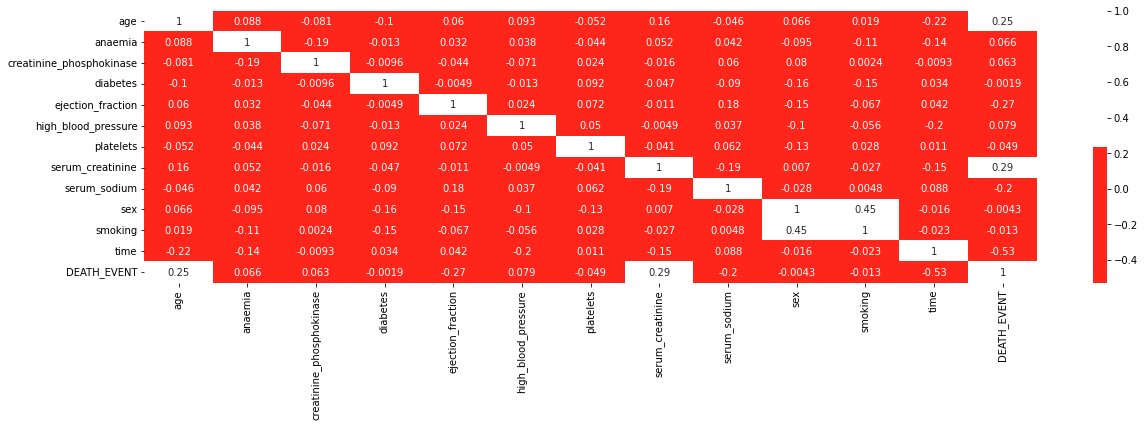

In [ ]:


plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);



* It is a huge matrix with too many features. We will check the correlation only with respect to **DEATH_EVENT**.

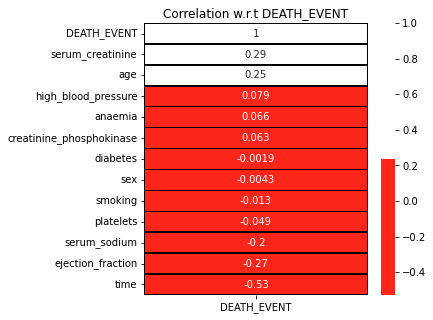

In [ ]:


corr = df1.corrwith(df1['DEATH_EVENT']).sort_values(ascending = False).to_frame()
corr.columns = ['DEATH_EVENT']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t DEATH_EVENT');



* Features like **high_blood_pressure**, **anaemia**, **creatinine_phosphokinase**, **diabetes**, **sex**, **smoking**, and **platelets** do not display any kind of correlation with **DEATH_EVENT**.

## Feature Selection for Categorical Features :

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

**Mutual Information Test :**

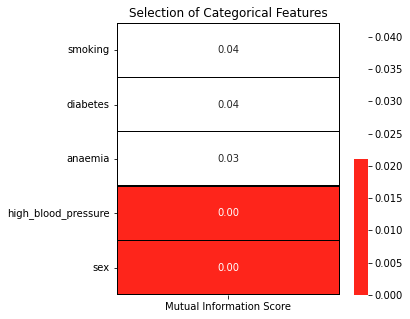

In [ ]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');



**Chi Squared Test :**

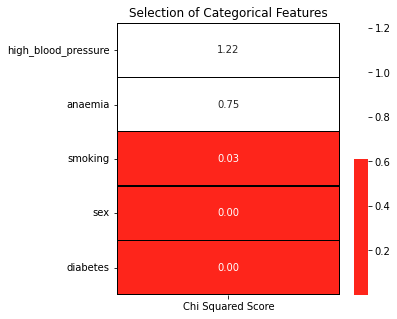

In [ ]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

* According to the above tests, none of the features should be selected for modeling.

## Feature Selection for Numerical Features :

ANOVA Test :

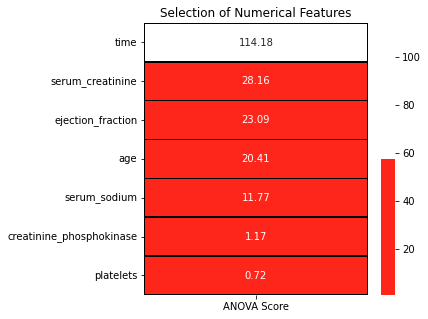

In [ ]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');



  * According to the test, **platelets** and **creatinine_phosphokinase** need to be left out for modeling.

  * We will create 2 models : 
   1. Based on the statistical test 
   2. Based on the domain information.

  * According to the statistical tests, we will drop the following features : **anaemia**, diabetes, **high_blood_pressure**, **sex**, **smoking**, **creatinine_phosphokinase**, **platelets**.

  * According to the Domain Information, we will drop the following features : **sex**, **platelets**.



In [ ]:
df2 = df1.copy(deep = True)

# Dataset for model based on Statistical Test :
df1 = df1.drop(columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'creatinine_phosphokinase', 'platelets'])

# Dataset for model based on Domain Information :
df2 = df2.drop(columns = ['sex','platelets'])

**Data Balancing using SMOTE :**

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

**Dataset for Model based on Statistical Test :**

In [ ]:


over = SMOTE()

f1 = df1.iloc[:,:5].values
t1 = df1.iloc[:,5].values
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)



Counter({1: 203, 0: 203})

**Dataset for Model based on Domain Information :**

In [ ]:
over = SMOTE()

f2 = df2.iloc[:,:10].values
t2 = df2.iloc[:,10].values
f2, t2 = over.fit_resample(f2, t2)
Counter(t2)

Counter({1: 203, 0: 203})



  * Here, we balance the data by increasing the minorty group to majority group. In this case we only increase the minority data points as the data is very less.

  * Typically, combination of undersampling and oversampling are utilized.
      * **Undersampling** : Trim down majority data values.
      * **Oversampling** : Minority data values increased to the majority data values.

  * Due to the use of synthetic data, we cannot evaluate the models using accuracy. We have duplicated the data, thus using accuracy would be misleading to evaluate the model.

  * We will use the confusion matrix, ROC-AUC graph-score for model evaluation. ROC-AUC gives us the relation between True Positive and False Positive rate.



# Modeling

* We create 2 versions of 3 machine learning algorithms based on the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.15, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.15, random_state = 2)

* Selecting the features from the above conducted tests and splitting the data into 85 - 15 train - test groups.

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))


**[1] XGBoostClassifier :**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

**Model based on Statistical Test :**

Cross Validation Score :  93.30%
ROC_AUC Score :  84.10%


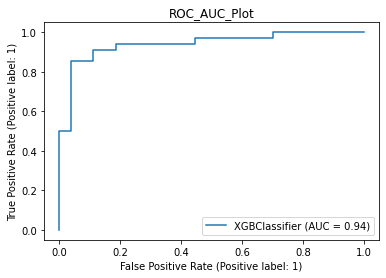

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



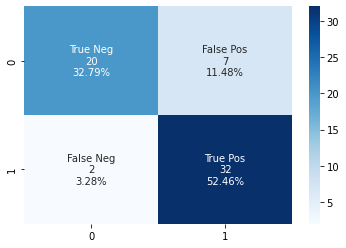

In [ ]:
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

**Model based on Domain Information :**

Cross Validation Score :  93.53%
ROC_AUC Score :  83.39%


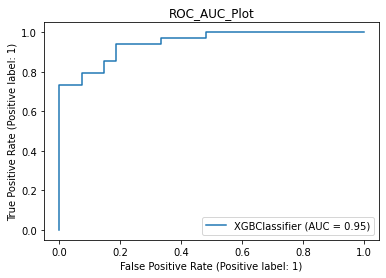

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



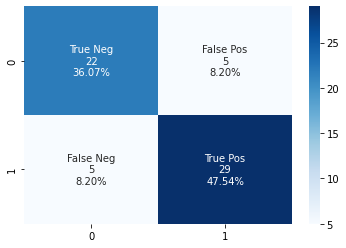

In [ ]:
model(classifier_xgb,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_xgb,x_test2,y_test2)

**[2] Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

**Model based on Statistical Test:**

Cross Validation Score :  90.09%
ROC_AUC Score :  78.59%


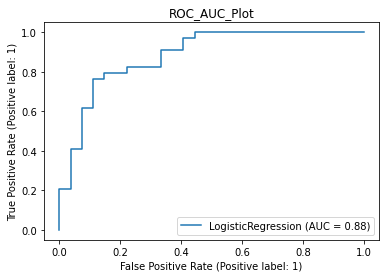

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



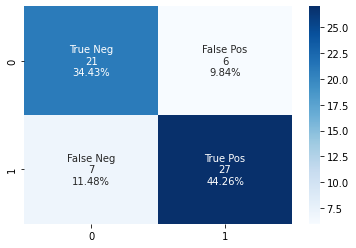

In [ ]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

**Model based on Domain Information :**

Cross Validation Score :  88.96%
ROC_AUC Score :  78.98%


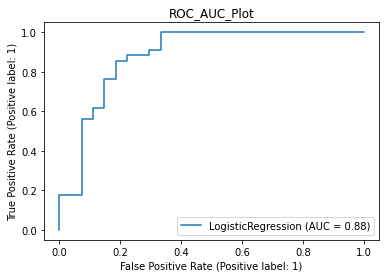

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



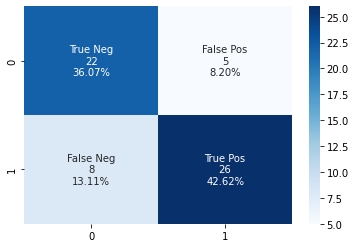

In [ ]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

**[3] Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

**Model based on Statistical Test :**

Cross Validation Score :  88.04%
ROC_AUC Score :  80.07%


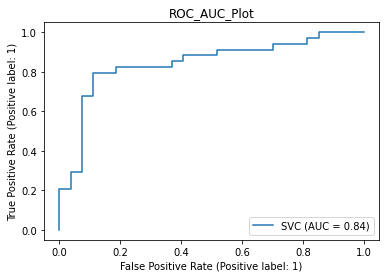

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



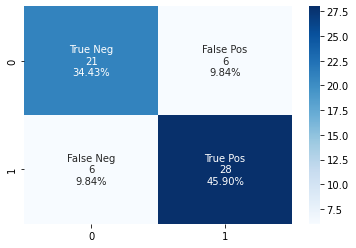

In [ ]:


model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)



**Model based on Domain Information :**

Cross Validation Score :  86.49%
ROC_AUC Score :  78.59%


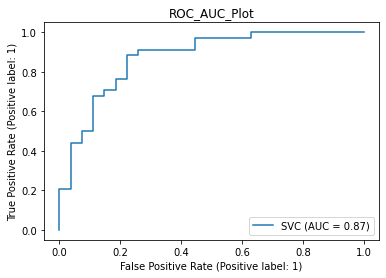

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



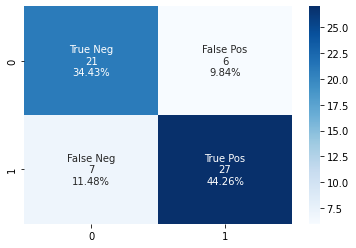

In [ ]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

## ML Alogrithm Results Table :


**Results Table for models based on Statistical Test :**

### ML Alogrithm Results Table :

#### Results Table for models based on Statistical Test : 

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|
|-|-|-|-|
|1|XGB Classifier|92.51%|86.33%|
|2|Logistic Regression|88.87%|83.39%|
|3|Support Vector Classifier|86.27%|79.68%|


#### Results Table for models based on Domain Information :


|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|
|-|-|-|-|
|1|XGB Classifier|93.78%|83.39%|
|2|Logistic Regression|89.97%|82.30%|
|3|Support Vector Classifier|86.07%|75.65%|

# Conclusion

- This is another good dataset for understanding how to handle binary classification problems however, size of the data is very low.


- As the size of the dataset is very small, we use SMOTE analysis to balance data by leveling the minority and majority data points of the target variable. Due to the use of synthetic data, evaluating the models based on accuracy is quite misleading. 


- In this case, 2 models are trained :
    
    1. Statistical Model 
    
    2. Domain Information Model

  The 2 models are very close to each other in terms of evaluation metrics.
    

- Outlier detection was not executed due to the low size of the dataset. 

# References :
- https://www.mayoclinic.org/diseases-conditions/heart-failure/symptoms-causes/syc-20373142#:~:text=Heart%20failure%20occurs%20when%20the,to%20appear%20blue%20(cyanotic).
- https://www.healthline.com/health/heart-failure
- https://emedicine.medscape.com/article/163062-overview
